# Numerical Integration and Differentiation

## 08.01 Numerical Integration

For $f : \mathbb{R} \rightarrow \mathbb{R}$ the definite integral over interval $[a, b]$:
$$
I(f) = \int_a^b f(x) dx
$$

is defined by the limit of Riemann sums shown below
$$
R_n = \sum_{i=1}^n (x_{i+1} - x_i) f(\xi_i) \quad n \rightarrow \infty
$$

Condition number of integration is proportional to length of interval of integration, $b-a$, and is inherently well-conditioned.

#### Quadrature Rule
Weighted sum, $Q_n(f)$ of a finite number of sample values of integrand function.
$$
Q_n(f) = \sum_{i=1}^n w_i f(x_i)
$$
where
* $w_i$ are the weights
* $x_i$ are the samples aka nodes or abscissas

Characteristics of $Q_n(f)$.
* How to choose samples?
* What should weights be?

If the interval is $(a, b)$, then the rule is **open**, else the interval $[a, b]$ is **closed**.

#### Method of Undetermined Coefficients
To derive n-point rule on interval $[a, b]$, form a system of equations with nodes $x_1, \cdots, x_n$ as the matrix $A$ and the definite integral of each of the $n$ polynomial basis functions over $[a, b]$ as the right hand side $b$.
* The unknowns are the weights, $w_i$ used by the quadrature rule, $Q_n(f)$.

##### Example
Determine the 3-point quadrature rule, $Q_3(f)$ using monomial basis.
$$
\begin{bmatrix}
1 & 1 & 1 \\
a & (a+b)/2 & b \\
a^2 & ((a+b)/2)^2 & b^2 \\
\end{bmatrix}
\begin{bmatrix}
w_1 \\
w_2 \\
w_3 \\
\end{bmatrix} =
\begin{bmatrix}
\int_a^b 1 dx = b-a \\
\int_a^b x dx = (b^2 - a^2)/2\\
\int_a^b x^2 dx = (b^3 - a^3)/3 \\
\end{bmatrix}
$$

The weights obtained by solving this system is known as **Simpson's rule**.
$$
w_1 = (b-a)/6, \quad w_2 = 2(b-a)/3, \quad w_3 = (b-a)/6
$$

#### Accuracy
Rough error bound on Quadrature rule given by:
$$
|I(f) - Q_n(f)| \leq \frac{1}{4} h^{n+1} ||f^{(n)}||_{\infty}
$$
where
* $h$ is the maximum spacing between samples
* $n$ is the number of samples

Higher accuracy can be obtained by decreasing $h$ or increasing $n$.

#### Stability
Integration is inherently stable because of its smoothing effect.

Condition number of the quadrature rule is the sum of the absolute values of the weights:
$$
\text{cond}(Q_n(f)) = \sum_{i=1}^n |w_i|
$$

## 08.02 Newton-Cotes Quadrature

Quadrature rules based on equally spaced nodes in interval $[a, b]$.

1. Midpoint rule (n=1, open)
$$
M(f) = (b-a)\, f \left( \frac{a+b}{2} \right)
$$

2. Trapezoid rule (n=2, closed)
$$
T(f) = \frac{b-a}{2}\, \left( f(a) + f(b) \right)
$$

3. Simpson's rule (n=3, closed)
$$
S(f) = \frac{b-a}{6}\, \left( f(a) + 4\,f(\frac{a+b}{2}) + f(b) \right)
$$

#### Error Estimation
Midpoint rule, $M(f)$, is about twice as accurate as trapezoid rule, $T(f)$.
* Error expansion for midpoint rule $M(f) + E(f) + F(f) + \cdots$ vs. trapezoid rule $T(f) - 2E(f) - 4F(f) - \cdots$.
* Difference in error between midpoint and trapezoid:
$$
E(f) \approx \frac{T(f) - M(f)}{3}
$$
* Halving the length of the interval, decreases the error in either rule by a factor of 1/8.

Simpson's rule, $S(f)$, is more accurate than midpoint rule, $M(f)$.
* Error expansion for Simpson's rule $2/3M(f) + 1/3T(f) - \cdots = S(f) - 2/3F(f) + \cdots$.

An n-point Newton-Cotes rule is of degree n-1 if *n* is even (example: Trapezoid rule), but of degree n if *n* is odd (example: Midpoint rule).
* Explains why midpoint is more accurate than trapezoid.
* Due to cancellation of positive and negative errors.

Using large number of equally spaced nodes may incur unwanted oscillations due to high degree polynomial.
* Newton-Cotes rules become arbitrarily ill-conditioned as $n \rightarrow \infty$ since $\sum_{i=1}^n |w_i| \rightarrow \infty$.

Use the midpoint, trapezoid, and Simpson's rule to compute the integral below and compare to the true result:
$$
I(g) = \int_{0}^1 e^{-t^2} dt \approx 0.746824
$$

In [1]:
import numpy as np

def quad_midpoint(fx, a, b):
    """
    Return definite integral of fx dx from [a, b] using midpoint rule.
    """
    return (b-a) * fx((a+b)/2.)

def quad_trapezoid(fx, a, b):
    """
    Return definite integral of fx dx from [a, b] using trapezoid rule.
    """
    return (b-a)/2. * (fx(a) + fx(b))

def quad_simpson(fx, a, b):
    """
    Return definite integral of fx dx from [a, b] using Simpson's rule.
    """
    return (b-a)/6. * (fx(a) + 4.*fx((a+b)/2.) + fx(b))


fx = lambda x: np.exp(-1.*x*x)
a, b = 0., 1.

# Observe midpoint is twice as accurate as trapezoid 
# despite being a lower order polynomial.  Also observe
# Simpson's is very close to the true result 0.746824.
print("midpoint:  ", quad_midpoint(fx, a, b))
print("trapezoid: ", quad_trapezoid(fx, a, b))
print("simpson:   ", quad_simpson(fx, a, b))

midpoint:   0.7788007830714049
trapezoid:  0.6839397205857212
simpson:    0.7471804289095104


## 08.03 Gaussian Quadrature

#### Clenshaw-Curtis Quadrature
Quadrature rules using Chebyshev points.
* Weights are always positive.
* Approximate integral always converges to exact integral as $n \rightarrow \infty$
* Implemented using FFT (discussed later in course)

#### Gaussian Quadrature
Nodes and weights are chosen to maximize degree.
* Derived by method of undetermined coefficients.
  * Observe that the integrand is not required to determine $x$ and $w$.
* Nodes and weights are parameters to be determined.
  * Unlike Newton-Cotes in which nodes are fixed and equally spaced.
* An n-point Gaussian quadrature rule is of degree $2n - 1$.

#### Change of Variable
Gaussian quadrature rules for the integrand $I(g)$ and computed for an interval $x$ given by $[\alpha, \beta]$ can be transformed to another interval $[a, b]$.
$$
I(g) = \frac{b-a}{\beta - \alpha} \sum_{i=1}^n w_i g \left( \frac{(b-a)x_i + a \beta - b \alpha}{\beta - \alpha} \right)
$$



##### Example
Derive 2-point Gaussian rule on $[-1, 1]$.
$$
G_2(f) = w_1 f(x_1) + w_2 f(x_2)
$$

Form the nonlinear system of equations:
$$
w_1 + w_2 = \int_{-1}^{1} dx = 2 \\
w_1 x_1 + w_2 x_2 = \int_{-1}^{1} x dx = 0 \\
w_1 x_1^2 + w_2 x_2^2 = \int_{-1}^{1} x^2 dx = 2/3 \\
w_1 x_1^3 + w_2 x_2^3 = \int_{-1}^{1} x^3 dx = 0 \\
$$

The Jacobian matrix, $J(x)$ of partial derivatives for this system is:
$$
J(x) = 
\begin{bmatrix}
\frac{\partial f_1}{\partial w_1} & \frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial w_2} & \frac{\partial f_1}{\partial x_2} \\
\frac{\partial f_2}{\partial w_1} & \frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial w_2} & \frac{\partial f_2}{\partial x_2} \\
\frac{\partial f_3}{\partial w_1} & \frac{\partial f_3}{\partial x_1} & \frac{\partial f_3}{\partial w_2} & \frac{\partial f_3}{\partial x_2} \\
\frac{\partial f_4}{\partial w_1} & \frac{\partial f_4}{\partial x_1} & \frac{\partial f_4}{\partial w_2} & \frac{\partial f_4}{\partial x_2}
\end{bmatrix}
$$

Solve for $w_1, w_2, x_1, x_2$ using Newton's method for nonlinear systems.  

The expected solution is:
* $x_1 = -1/\sqrt{3}, x_2 = 1/\sqrt{3}, w_1 = 1, w_2 = 1$
* $G_2(f) = 1 \cdot f(-1/\sqrt{3}) + 1 \cdot f(1/\sqrt{3})$

A 2-point Gaussian quadrature rule is of degree 3 where $(3 = 2n - 1; n = 2)$.

In [2]:
import math
import numpy as np
import scipy.optimize as opt

def fx(x):
    """
    Compute the residuals for the system using x = [w1, x1, w2, x2]^T.
    """
    res = np.empty(x.size)
    res[0] = x[0] + x[2] - 2.
    res[1] = x[0]*x[1] + x[2]*x[3]
    res[2] = x[0]*math.pow(x[1], 2) + x[2]*math.pow(x[3], 2) - 2./3.
    res[3] = x[0]*math.pow(x[1], 3) + x[2]*math.pow(x[3], 3)
    return res


def Jfx(x):
    """
    Compute Jacobian matrix of partial derivatives of f_i wrt x_i.
    """
    jac = np.zeros((x.size, x.size))
    jac[0, :] = np.array([1., 0., 1., 0.])
    jac[1, :] = np.array([x[1], x[0], x[3], x[2]])
    jac[2, :] = np.array([math.pow(x[1], 2), 2.*x[0],
                          math.pow(x[3], 2), 2.*x[2]])
    jac[3, :] = np.array([math.pow(x[1], 3), 3.*x[0]*x[0],
                          math.pow(x[3], 3), 3.*x[2]*x[2]])
    return jac


# Find the root of the nonlinear system using scipy.optimize.root.
x0 = np.random.rand(4)
res = opt.root(fx, x0, jac=Jfx)
np.testing.assert_equal(res.success, True)

# NOTE(mmorais): There are two solutions with sign of x1 and x2 flipped.
expected1 = np.array([1., -1./math.sqrt(3), 1., 1./math.sqrt(3)])
expected2 = np.array([1., 1./math.sqrt(3), 1., -1./math.sqrt(3)])
expected = expected1 if res.x[1] < 0. else expected2
np.testing.assert_almost_equal(res.x, expected)

Use the 2-point Gaussian quadrature rule computed in the previous step to solve the following integral:
$$
I(g) = \int_{-1}^1 e^{-t^2} dt
$$

In [3]:
import numpy as np
import scipy.integrate as integrate

def gaussian_quadrature(ft, x, w):
    """
    Return definite integral of ft dt using n-point Gaussian quadrature.
    
    ft is the function to integrate.
    x are the nodes of integration.
    w are the weights of integration.
    """
    vft = np.vectorize(ft)
    return np.dot(w, vft(x))


# Integrate using 2-point Gaussian quadrature rule.
# NOTE(mmorais): Nodes and weights computed from previous step.
ft = lambda t: np.exp(-1.*t*t)
x = np.array([-1./np.sqrt(3), 1./np.sqrt(3)])
w = np.array([1., 1.])
# NOTE(mmorais): Limits of integration not passed, implicit in rule.
g2 = gaussian_quadrature(ft, x, w)

# Compare to result obtained from scipy.integrate.fixed_quad.
a, b = -1., 1.
expected, _ = integrate.fixed_quad(ft, a=a, b=b, n=2)
np.testing.assert_almost_equal(g2, expected)

Use the 2-point Gaussian quadrature rule along with the change of variable to solve the following integral:
$$
I(g) = \int_{-2}^2 e^{-t^2} dt
$$

In [4]:
import numpy as np
import scipy.integrate as integrate

def gaussian_quadrature(ft, x, w, a1, b1, a2, b2):
    """
    Return definite integral of ft dt using n-point Gaussian quadrature.
    
    Use a change of variable to modify the limits of integration.

    ft is the function to integrate.
    x are the nodes of integration.
    w are the weights of integration.
    [a1, b1] are the limits of integration used to compute the rule.
    [a2, b2] are the new limits of integration.
    """
    b1a1, b2a2 = b1-a1, b2-a2
    vft = np.vectorize(ft)
    x2 = vft((b2a2*x + a2*b1 - b2*a1)/b1a1)
    return (b2a2/b1a1) * np.dot(w, x2)


# Integrate using 2-point Gaussian quadrature rule.
# NOTE(mmorais): Nodes and weights computed from previous step.
ft = lambda t: np.exp(-1.*t*t)
x = np.array([-1./np.sqrt(3), 1./np.sqrt(3)])
w = np.array([1., 1.])
a1, b1, a2, b2 = -1., 1., -2., 2.
g2 = gaussian_quadrature(ft, x, w, a1, b1, a2, b2)

# Compare to result obtained from scipy.integrate.fixed_quad.
expected, _ = integrate.fixed_quad(ft, a=a2, b=b2, n=2)
np.testing.assert_almost_equal(g2, expected)

## 08.04 Composite and Adaptive Quadrature

#### Composite Quadrature
Subdivide original interval $[a, b]$ into $k$ subintervals of length $h = (b-a)/k$ and apply simple quadrature rule in each subinterval.
* Equivalent to using piecewise interpolation for quadrature.
* Easily made progressive.

Composite midpoint rule
$$
M_k(f) = h \sum_{j=1}^k f \left( \frac{x_{j-1} + x_j}{2} \right)
$$

Composite trapezoid rule
$$
T_k(f) = h \left( \frac{1}{2} f(a) + f(x_1) + \cdots + f(x_{k-1}) + \frac{1}{2} f(b) \right)
$$

The nodes along the interval are given by: $x_j = a + jh, \quad j=0, \cdots, k$

#### Adaptive Quadrature
Recursively apply composite quadrature to smaller subintervals until the difference between the rules falls below an error tolerance.

Weaknesses
* Points at which integrand function is sampled might not include significant features.
* Potentially inefficient in handling discontinuities in integrand.

Use the composite trapezoid rule to compute the integral below:
$$
I(g) = \int_{0}^1 e^{-t^2} dt \approx 0.746824
$$

In [5]:
import numpy as np

def quad_trapezoid_composite(fx, a, b, k):
    """
    Return definite integral of fx dx from [a, b] using trapezoid rule.
    
    k is the number of subintervals of width h=(b-a)/k.
    """
    h = 1.*(b-a)/k
    x = np.linspace(a+h, b-h, k-1)
    vfx = np.vectorize(fx)
    return h * (0.5*fx(a) + np.sum(vfx(x)) + 0.5*fx(b))


# Integrate using composite trapezoid rule.
fx = lambda x: np.exp(-1.*x*x)
a, b, k = 0., 1., 10
Ifx = quad_trapezoid_composite(fx, a, b, k)
print("composite trapezoid: ", Ifx)

# Compare to result obtained from numpy.trapz.
x = np.linspace(a, b, k+1)
vfx = np.vectorize(fx)
y = vfx(x)
expected = np.trapz(y, x)
np.testing.assert_almost_equal(Ifx, expected)

composite trapezoid:  0.7462107961317495


## 08.05 Special Integration Problems

#### Tabular Integration
For integrands defined by values at discrete points, use piecewise interpolant.
* Good interpolants: Hermite cubic or cubic spline

#### Improper Integrals
For integrals where one or both limits are infinite, use any of the following methods:
* Replace infinite limits by carefully chosen finite values.
* Transform variable of integration so new interval is finite.

#### Double Integrals
For integrands over two intervals, use any of the following:
* Use a pair of quadrature routines.  Each time the outer quadrature routine is called, it in turn calls the inner quadrature routine.

#### Multiple Integrals
For integrands over arbitrary multiple intervals, use Monte Carlo method.
* Sample $n$ points distributed randomly overly interval.
* Evaluate the function at the $n$ points to obtain a mean value.
* Multiply the mean value by the area or volume of the domain to obtain an estimate of the integral.

Weakness
* Error in estimate goes to zero as $1/\sqrt{n}$ or roughly 1 decimal digit for 100-fold increase in the number of samples.

Advantage
* Works for functions with discontinuities.
* Convergence rate is independent of the number of dimensions, hence effective for high dimensions.

#### Integral Equations
Integrand contains an unknown function, $u(t)$ to be determined:
$$
\int_a^b K(s, t) u(t) dt = f(s)
$$
where
* $K(s, t)$ is the **kernel** and $f(s)$ are known

Solve by discretizing variables and replacing the integral with a quadrature rule in order to solve the system $Au = y$ for the unknown function.
$$
\sum_{j=1}^n w_j\, K(s_i, t_j)\, u(t_j) = f(s_i), \quad i=1,\cdots,n
$$
where
* $w_j K(s_i, t_j)$ is the matrix of coefficients $A$
* $f(s_i)$ is right hand side $y$

## 08.06 Numerical Differentiation

Unlike integration, differentiation is inherently sensitive.
* Two functions with similar definite integrals can have very different derivatives.
* Round off error is significant when $h$ is small because we are subtracting two nearly identical quantities which is prone to cancellation.

#### Discrete Data
To compute the derivative of discrete data points, fit the data using interpolation or least squares (depending on whether the data are noisy) and compute the derivative of the fitted function at the data points.

#### Finite Difference Approximations
Given a smooth function $f : \mathbb{R} \rightarrow \mathbb{R}$ and step size $h$ approximate its first and second derivatives.

**First Order Accurate**

Forward Difference Approximation
$$
f'(x) \approx \frac{f(x+h) - f(x)}{h}
$$

Backward Difference Approximation
$$
f'(x) \approx \frac{f(x) - f(x-h)}{h}
$$

**Second Order Accurate**

Centered Difference Approximation of First Derivative
$$
f'(x) \approx \frac{f(x+h) - f(x-h)}{2h}
$$

Centered Difference Approximation of Second Derivative
$$
f''(x) \approx \frac{f(x+h) - 2f(x) + f(x-h)}{h^2}
$$

#### Automatic Differentiation
Derivative of arbitrary functions can be computed using chain rule.
* Result is subject only to rounding error, but no discretization error.

Compare the error of all finite difference approximations of $f'(x)$ as a function of the step size, $h$, for the function $\sin(x)$ at $x = 1$.

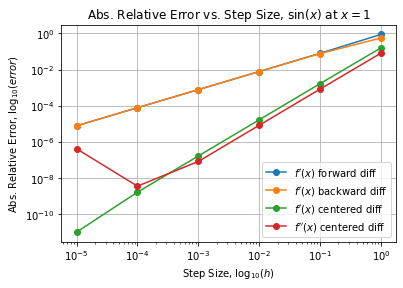

In [6]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

def forward_dfx(fx, x, h):
    """Compute f'(x) using forward difference approximation."""
    return (fx(x+h) - fx(x))/h

def backward_dfx(fx, x, h):
    """Compute f'(x) using backward difference approximation."""
    return (fx(x) - fx(x-h))/h

def centered_dfx(fx, x, h):
    """Compute f'(x) using centered difference approximation."""
    return (fx(x+h) - fx(x-h))/(2.*h)

def centered_d2fx(fx, x, h):
    """Compute f''(x) using centered difference approximation."""
    return (fx(x+h) - 2.*fx(x) + fx(x-h))/(h*h)


# f(x) and exact first and second derivative.
fx = lambda x: np.sin(x)
d1fx = lambda x: np.cos(x)
d2fx = lambda x: -1. * np.sin(x)

# List of true functions and corresponding approximations.
trues = [d1fx, d1fx, d1fx, d2fx]
funcs = [forward_dfx, backward_dfx, centered_dfx, centered_d2fx]
labels = ["$f'(x)$ forward diff", "$f'(x)$ backward diff", 
          "$f'(x)$ centered diff", "$f''(x)$ centered diff"]

# Values of x and h.
x = 1.0
h = np.array([1., 1e-1, 1e-2, 1e-3, 1e-4, 1e-5])

# Compute the relative error between approximation and true value. 
relerrors = []
for true, func in zip(trues, funcs):
    t = true(x)
    vfunc = np.vectorize(lambda step: func(fx, x, step))
    approx = vfunc(h)
    relerrors.append(abs((t-approx)/t))

# Plot the relative error against step size for each function.
for relerror, label in zip(relerrors, labels):
    plt.loglog(h, relerror, marker='o', label=label)
plt.title('Abs. Relative Error vs. Step Size, $\sin(x)$ at $x=1$')
plt.ylabel('Abs. Relative Error, $\log_{10}(error)$')
plt.xlabel('Step Size, $\log_{10}(h)$')
plt.grid()
plt.legend()
plt.show()

## 08.07 Richardson Extrapolation

In the context of integration or differentiation, let $F(h)$ be the value obtained for an algorithm with step size $h$.  If we compute $F(h)$ as $h \rightarrow 0$ then we can **extrapolate** from the known values to obtain a value for $F(0)$.
* Expect that extrapolated value has higher accuracy at $h=0$ than the values on which it is based.

Richardson extrapolation based on a linear combination of two approximations given by:
$$
a_0 = F(h) + \frac{F(h) - F(h/q)}{q^{-p} - 1}
$$
where
* $F(h)$ and $F(h/q)$ are values computed at 2 step sizes, $h$ and $h/q$
* $p$ is the order of the approximating function

#### Romberg Integration
Combine composite quadrature of a Newton-Cotes rule with Richardson extrapolation to produce very high accuracy definite integrals.

Technique represend by lower triangular matrix $R$.
* Values along the first column, $j=1$ represent the Newton-Cotes estimate of the integral with the number of subintervals doubled at each row of the matrix, $k = 2^{i}$.
* Values of elements at index $j > 1$ in the same row, $r_{i,j}$ are formed from the extrapolation of the elements to the left $r_{i,j-1}$ and to the left and previous row, $r_{i-1,j-1}$.
$$
r_{i,j} = \frac{4^{j} r_{i,j-1} - r_{i-1,j-1}}{4^{j}-1}
$$
* Terminate the process when the absolute value of the difference in successive rightmost values falls below some tolerance, $|r_{i,j-1} - r_{i-1,j-1}| < \epsilon$
$$
R =
\begin{bmatrix}
r_{1,1} \\
r_{2,1} & r_{2,2} \\
r_{3,1} & r_{3,2} & r_{3,3} \\
\end{bmatrix}
$$

Use Richardson extrapolation to improve the accuracy of a first order forward difference approximation of $f'(x)$ for $\sin(x)$ at $x=1$.

In [7]:
import math
import numpy as np

def richardson_extrapolation(dfx, x, h, q, p):
    """
    Compute Richardson extrapolation based on F(x,h) and F(x,(h/q)).
    
    dfx is an approximation of f'(x) at x using step size h
    q is the ratio of the step sizes
    p is the order of the approximating function
    """
    fh, fhq = dfx(x, h), dfx(x, (h/q))
    return fh + (fh - fhq)/(math.pow(q, -1.*p) - 1.)

def forward_dfx(fx, x, h):
    """Compute f'(x) using forward difference approximation."""
    return (fx(x+h) - fx(x))/h


# f(x) and f'(x) are the true function and derivative at x.
fx = lambda x: np.sin(x)
dfx = lambda x: np.cos(x)
x = 1.
dfx1 = dfx(x)

# Compute the Richardson extrapolation for h, q, and p.
h, q, p = 0.5, 2., 1.
# First order forward difference approximation of f'(x).
approxdfx = lambda x, h: forward_dfx(fx, x, h)
# Improved approximation of f'(x).
approxdfx1 = richardson_extrapolation(approxdfx, x, h, q, p)

# Compute the relative error to the true derivative.
relerror = ((dfx1-approxdfx1)/dfx1)
print("relerror: ", relerror)

relerror:  -0.014360047767324245


Use Romberg integration to compute the integral below:
$$
\int_0^{\pi/2} \sin(x) dx = 1
$$

In [8]:
import math
import numpy as np
import scipy.integrate as integrate

def quad_trapezoid_composite(fx, a, b, k):
    """
    Return definite integral of fx dx from [a, b] using trapezoid rule.

    fx is the function to integrate. 
    a, b are the limits of integration.
    k is the number of subintervals of width h=(b-a)/k.
    """
    h = 1.*(b-a)/k
    x = np.linspace(a+h, b-h, k-1)
    vfx = np.vectorize(fx)
    return h * (0.5*fx(a) + np.sum(vfx(x)) + 0.5*fx(b))

def romberg_integration(fx, a, b, kmax=4):
    """
    Return definite integral of fx from [a, b] using Romberg integration.

    fx is the function to integrate. 
    a, b are the limits of integration.
    kmax is the maximum number of subintervals where h=2^{-k}.
    """
    R = np.zeros((kmax, kmax))
    for i in range(kmax):
        # Double the number of subintervals at each iteration.
        k = math.pow(2., i+1)
        # Compute the definite integral using composite trapezoid rule.
        R[i,0] = quad_trapezoid_composite(fx, a, b, k)
        for j in range(1, i+1):
            # Update the extrapolated values.
            fxh, fxhq, c1 = R[i,j-1], R[i-1,j-1], math.pow(4.,j)
            R[i,j] = (c1*fxh - fxhq)/(c1-1.)
    return R[kmax-1,kmax-1]


# Compute integral of f(x) from [a, b].
fx = lambda x: np.sin(x)
a, b = 0., np.pi/2.
result = romberg_integration(fx, a, b)

# Compute the relative error to the true integral.
Ifx = 1.
relerror = ((Ifx-result)/Ifx)
print("relerror: ", relerror)

# Compare to result obtained from scipy.integrate.romberg.
expected = integrate.romberg(fx, a, b)
np.testing.assert_almost_equal(result, expected)

relerror:  -2.983724378680108e-11


## Summary: Numerical Integration and Differentiation

#### Integration
* Integral is approximated by weighted sum of sample values.
  * Integration is inherently well conditioned.
* Quadrature rules are derived by integrating polynomial interpolant.
  * Newton-Cotes rules such as midpoint, trapezoid, and Simpson use equally spaced nodes and choose weights to maximize polynomial degree.
    * If n is even, then degree is $n-1$.  Example: trapezoid.
    * If n is odd, then degree is $n$.  Example: midpoint.
    * Midpoint is twice as accurate as trapezoid.
  * Gaussian rules choose nodes and weights to maximize degree ($2n-1$).
* Composite quadrature subdivides interval of integration and uses Newton-Cotes rules in each subinterval.
* Adaptive quadrature recursively applies composite quadrature to smaller subintervals until the difference between the rules falls below an error tolerance.
* Romberg integration uses Richardson extrapolation to produce very high accuracy (up to machine precision) definite integrals.

#### Differentiation
* Differentiation is approximated by successive differences.
  * Differentiation is inherently sensitive.
  * Round off error is significant when $h$ is small because we are subtracting two nearly identical quantities which is prone to cancellation.
* For discrete data, best approach is to fit function to data using a piecewise interpolant such as Hermite cubic or cubic spline.
  * If data are noisy, then least squares is more appropriate.
* Richardson extrapolation can be used with numerical differentiation to improve the accuracy of the results on which the extrapolation is based.